In [1]:
from UMAP1 import *
import numpy as np
import pandas as pd




In [2]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None).iloc[:,0:4]



In [3]:
umap = UMAP(X =data, min_dist = 0.25, n_dim= 2, k =15, sym_method=2)


In [4]:
umap.fit_transform()

0%|          | 0/200 [00:00<?, ?it/s]
[[ 0.00470738 -0.00012496]
 [ 0.0047064  -0.00012506]
 [ 0.00470607 -0.00012511]
 [ 0.00470624 -0.00012508]
 [ 0.00470581 -0.00012514]
 [ 0.00470623 -0.00012509]
 [ 0.00470552 -0.00012518]
 [ 0.00470693 -0.00012501]
 [ 0.00470597 -0.00012512]
 [ 0.00470698 -0.00012499]
 [ 0.00470727 -0.00012497]
 [ 0.0047057  -0.00012514]
 [ 0.004706   -0.00012511]
 [ 0.00470505 -0.00012523]
 [ 0.00470482 -0.00012526]
 [ 0.00470501 -0.00012524]
 [ 0.00470551 -0.00012518]
 [ 0.00470694 -0.00012501]
 [ 0.00470512 -0.00012522]
 [ 0.0047066  -0.00012505]
 [ 0.00470471 -0.00012522]
 [ 0.00470606 -0.00012511]
 [ 0.00470386 -0.00012537]
 [ 0.00470527 -0.00012463]
 [ 0.00470423 -0.00012499]
 [        nan         nan]
 [ 0.00470597 -0.00012506]
 [        nan         nan]
 [        nan         nan]
 [ 0.00470635 -0.00012504]
 [ 0.00470604 -0.00012504]
 [ 0.00470523 -0.00012519]
 [ 0.00470529 -0.0001252 ]
 [ 0.00470646 -0.00012507]
 [ 0.00470698 -0.00012499]
 [ 0.00470434 -0.

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [5]:
y_diff = np.expand_dims(umap.init_Y(), 1) - np.expand_dims(umap.init_Y(), 0)


This data set contains 30 samples
[[0.   0.29 0.26 0.42]
 [0.29 0.   0.09 0.11]
 [0.26 0.09 0.   0.06]
 [0.42 0.11 0.06 0.  ]]


[0.00999999999999801, 0.020000000000003123, 0.05999999999999517, 0.03000000000000824]

Mean sigma = 0.05762080351511637
Hyperparameters a = 1.1214363422489875 and b = 1.0574998767490977
Running Gradient Descent: 

False
Cross-Entropy = 0.0205694119418522 after 0 iterations
False
False
False
False
False
False
False
False
False
False
Cross-Entropy = 0.0033685911693154755 after 10 iterations
False
False
False
False
False
False
False
False
False
False
Cross-Entropy = 0.0030077141605215196 after 20 iterations
False
False
False
False
False
False
False
False
False
False
Cross-Entropy = 0.0029342454961353037 after 30 iterations
False
False
False
False
False
False
False
False
False
False
Cross-Entropy = 0.0033300544550878266 after 40 iterations
False
False
False
False
False
False
False
False
False
False
Cross-Entropy = 0.002888805276684239 after 50 iterations
False
F

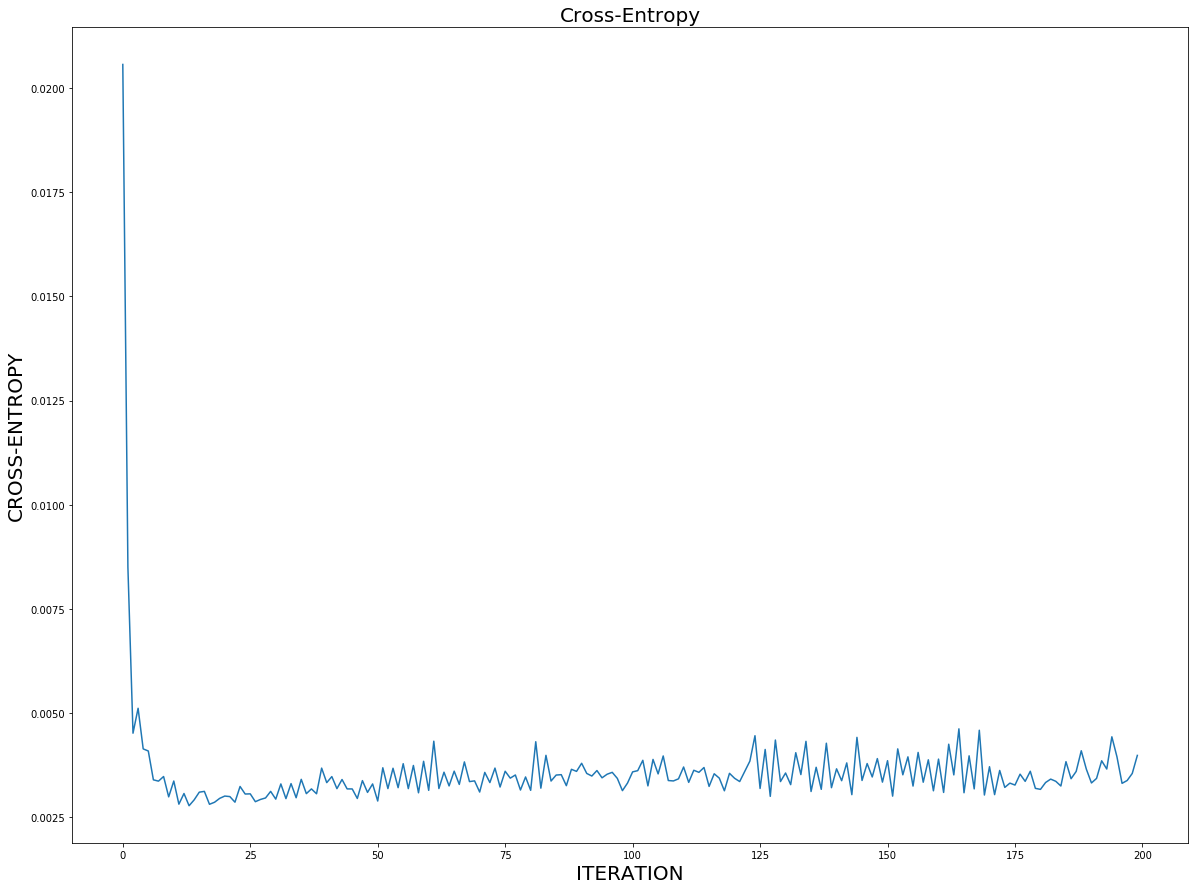

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn import preprocessing


X_train = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",header=None).iloc[:30,0:4]

n = X_train.shape[0]
print("\nThis data set contains " + str(n) + " samples")
#X_train = preprocessing.normalize(X_train)

dist = np.square(euclidean_distances(X_train, X_train))
rho = [sorted(dist[i])[1] for i in range(dist.shape[0])]
print(dist[0:4, 0:4])
print('\n')
print(rho[0:4])

def prob_high_dim(sigma, dist_row):
    """
    For each row of Euclidean distance matrix (dist_row) compute
    probability in high dimensions (1D array)
    """
    d = dist[dist_row] - rho[dist_row]; d[d < 0] = 0
    return np.exp(- d / sigma)

def k(prob):
    """
    Compute n_neighbor = k (scalar) for each 1D array of high-dimensional probability
    """
    return np.power(2, np.sum(prob))

def sigma_binary_search(k_of_sigma, fixed_k):
    """
    Solve equation k_of_sigma(sigma) = fixed_k 
    with respect to sigma by the binary search algorithm
    """
    sigma_lower_limit = 0; sigma_upper_limit = 1000
    approx_sigma = (sigma_lower_limit + sigma_upper_limit) / 2
    while abs(k_of_sigma(approx_sigma) - fixed_k) > 0.01:
        approx_sigma = (sigma_lower_limit + sigma_upper_limit) / 2
        if k_of_sigma(approx_sigma) < fixed_k:
            sigma_lower_limit = approx_sigma
        else:
            sigma_upper_limit = approx_sigma
        if np.abs(fixed_k - k_of_sigma(approx_sigma)) <= 1e-5:
            break
    return approx_sigma

N_NEIGHBOR = 15
prob = np.zeros((n,n)); sigma_array = []
for dist_row in range(n):
    func = lambda sigma: k(prob_high_dim(sigma, dist_row))
    binary_search_result = sigma_binary_search(func, N_NEIGHBOR)
    prob[dist_row] = prob_high_dim(binary_search_result, dist_row)
    sigma_array.append(binary_search_result)
    if (dist_row + 1) % 100 == 0:
        print("Sigma binary search finished {0} of {1} cells".format(dist_row + 1, n))
print("\nMean sigma = " + str(np.mean(sigma_array)))


MIN_DIST = 0.25

x = np.linspace(0, 3, 300)

def f(x, min_dist):
    y = []
    for i in range(len(x)):
        if(x[i] <= min_dist):
            y.append(1)
        else:
            y.append(np.exp(- x[i] + min_dist))
    return y

dist_low_dim = lambda x, a, b: 1 / (1 + a*x**(2*b))

p , _ = optimize.curve_fit(dist_low_dim, x, f(x, MIN_DIST))

a = p[0]
b = p[1] 
print("Hyperparameters a = " + str(a) + " and b = " + str(b))

P = (prob + np.transpose(prob)) / 2

def prob_low_dim(Y):
    """
    Compute matrix of probabilities q_ij in low-dimensional space
    """
    inv_distances = np.power(1 + a * np.square(euclidean_distances(Y, Y))**b, -1)
    return inv_distances

def CE(P, Y):
    """
    Compute Cross-Entropy (CE) from matrix of high-dimensional probabilities 
    and coordinates of low-dimensional embeddings
    """
    Q = prob_low_dim(Y)
    return - P * np.log(Q + 0.01) - (1 - P) * np.log(1 - Q + 0.01)

def CE_gradient(P, Y):
    """
    Compute the gradient of Cross-Entropy (CE)
    """
    y_diff = np.expand_dims(Y, 1) - np.expand_dims(Y, 0)
    inv_dist = np.power(1 + a * np.square(euclidean_distances(Y, Y))**b, -1)
    
    Q = np.dot(1 - P, np.power(0.001 + np.square(euclidean_distances(Y, Y)), -1))
    np.fill_diagonal(Q, 0)
    print(np.isnan(prob).any())
    Q = Q / np.sum(Q, axis = 1, keepdims = True)

    fact=np.expand_dims(a*P*(1e-8 + np.square(euclidean_distances(Y, Y)))**(b-1) - Q, 2)
    return 2 * b * np.sum(fact * y_diff * np.expand_dims(inv_dist, 2), axis = 1)

N_LOW_DIMS = 2
LEARNING_RATE = 1
MAX_ITER = 200

np.random.seed(12345)
model = SpectralEmbedding(n_components = N_LOW_DIMS, n_neighbors = 10)
y = model.fit_transform(np.log(X_train + 1))
#y = np.random.normal(loc = 0, scale = 1, size = (n, N_LOW_DIMS))
CE_array = []
print("Running Gradient Descent: \n")
for i in range(MAX_ITER):
    y = y - LEARNING_RATE * CE_gradient(P, y)
    #plt.figure(figsize=(20,15))
    #plt.scatter(y[:,0], y[:,1], cmap = 'tab10', s = 50)
    #plt.title("UMAP on Cancer Associated Fibroblasts (CAFs): Programmed from Scratch", fontsize = 20)
    #plt.xlabel("UMAP1", fontsize = 20); plt.ylabel("UMAP2", fontsize = 20)
    #plt.savefig('UMAP_Plots/UMAP_iter_' + str(i) + '.png')
    #plt.close()
    
    CE_current = np.sum(CE(P, y)) / 1e+5
    CE_array.append(CE_current)
    if i % 10 == 0:
        print("Cross-Entropy = " + str(CE_current) + " after " + str(i) + " iterations")

plt.figure(figsize=(20,15))
plt.plot(CE_array)
plt.title("Cross-Entropy", fontsize = 20)
plt.xlabel("ITERATION", fontsize = 20); plt.ylabel("CROSS-ENTROPY", fontsize = 20)
plt.show()

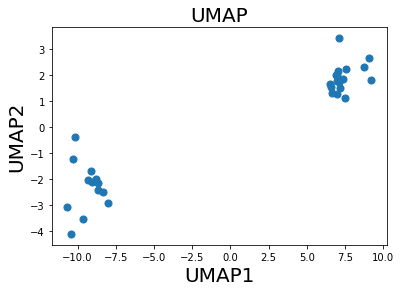

In [37]:
y
plt.scatter(y[:, 0], y[:, 1], cmap = 'tab10', s = 50)
plt.title('UMAP', fontsize = 20)
plt.xlabel("UMAP1", fontsize = 20)
plt.ylabel("UMAP2", fontsize = 20)
plt.show()

In [8]:
from umap import UMAP
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
model = UMAP(n_neighbors = 15, min_dist = 0.25, n_components = 2, verbose = True)
umap = model.fit_transform(X)
plt.scatter(umap[:, 0], umap[:, 1], cmap = 'tab10', s = 50)
plt.title('UMAP', fontsize = 20)
plt.xlabel("UMAP1", fontsize = 20)
plt.ylabel("UMAP2", fontsize = 20)
plt.show()

ImportError: cannot import name 'UMAP' from 'umap' (/Users/nghia/opt/anaconda3/lib/python3.7/site-packages/umap/__init__.py)

In [25]:
normalized

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,